# Neural Network for Handwritten Digits Classification

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
# Import the dataset
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [50]:
# How many samples in the train dataset
print('Images in x_train:',len(x_train))

# How many samples in the test dataset
print('Images in x_test:',len(x_test))

print('Each image size in x_train:',x_train[0].shape)
# It can be seen that the sample is a 28*28 pixel image

print('Images shapes in x_train:',x_train.shape)

Images in x_train: 60000
Images in x_test: 10000
Each image size in x_train: (28, 28)
Images shapes in x_train: (60000, 28, 28)


The first image in y_train is: 5
The features of the first image in x_train are: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0 

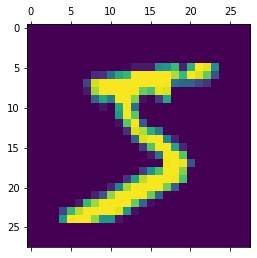

In [51]:
# VIP STEP
# If you want to see what the sample looks like
plt.matshow(x_train[0])

# to compare with the true result
print('The first image in y_train is:',y_train[0])

# to show the first item in x_train
print('The features of the first image in x_train are:', x_train[0])

In [41]:
# VIP STEP
# Since we know the image is 255 pixel, we need to scale the feature
x_train = x_train / 255
x_test = x_test / 255

In [42]:
# VIP STEP: flatten
# Flatten the training dataset,which means to convert the image into the single dimentional array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_train_flattened.shape

# Also need to apply flattened to the test dataset
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [43]:
# Show a example that we have changed the sample shape from 3D (6000,28,28) to 2D (6000, 784)
x_train_flattened[0].shape

(784,)

In [45]:
# Create a neural network WITHOUT HIDDEN LAYER
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer ='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4914 - accuracy: 0.8772
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3065 - accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2852 - accuracy: 0.9205
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2750 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2679 - accuracy: 0.9257
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2629 - accuracy: 0.9285
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2588 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2551 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2525 - accuracy: 0.9304
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.250

In [46]:
# to evaluate how the model performed on the test dataset
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 578us/step - loss: 0.2594 - accuracy: 0.9283


[0.2593516707420349, 0.9283000230789185]

In [52]:
# Try to predict the first image of test dataset and compare with the true values
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

array([2.3400846e-06, 1.2464581e-12, 7.3636947e-06, 9.2948377e-03,
       3.2167466e-07, 5.0674869e-05, 1.4716317e-11, 7.3780477e-01,
       4.0075232e-05, 5.1566958e-04], dtype=float32)

In [53]:
#VIP STEP
# Since the results provide the probilities, we need the find the corresponding value of the max values
np.argmax(y_predicted[0])

7

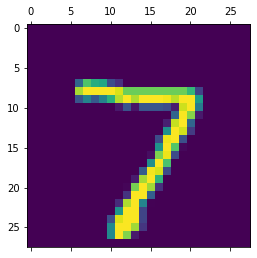

In [54]:
# Compare the predicted value with the actual value
plt.matshow(x_test[0])

In [55]:
# VIP STEP
# Generalize the process: transfer the probability to the label
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [61]:
# Using confusion matrix to see how the model performed
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    7,    3,    2,    0],
       [   0, 1108,    4,    2,    0,    1,    4,    2,   14,    0],
       [   4,    5,  934,   15,    7,    6,   11,   12,   35,    3],
       [   2,    0,   18,  926,    0,   21,    2,   13,   22,    6],
       [   1,    1,    5,    1,  915,    0,    8,    4,   12,   35],
       [   7,    2,    3,   38,    8,  779,   11,    7,   30,    7],
       [  10,    3,    8,    1,    7,   15,  909,    2,    3,    0],
       [   1,    6,   24,    4,    5,    1,    0,  951,    5,   31],
       [   4,    6,    6,   18,    9,   20,    6,   10,  888,    7],
       [   9,    6,    1,   11,   22,    5,    0,   30,   11,  914]])>

Text(69.0, 0.5, 'Truth')

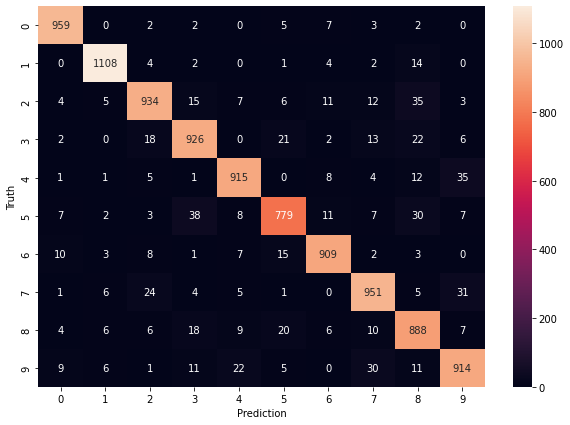

In [64]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [65]:
# Create a neural network with one HIDDEN LAYER
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer ='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_flattened, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2874 - accuracy: 0.9196
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1317 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0962 - accuracy: 0.9712
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0757 - accuracy: 0.9781
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0603 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0342 - accuracy: 0.9897
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0296 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.024

In [66]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 745us/step - loss: 0.0810 - accuracy: 0.9762


[0.08095821738243103, 0.9761999845504761]

In [ ]:
# VIP STEP: without flatten step(reshape)
model = keras.Sequential([
    keras.layer.Flatten(input_shape = (28,28),
    keras.layer.Dense(100, activation = 'relu'),
    keras.layer.Dense(10, activation = 'sigmoid')
])
    
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 10)
# This will give result same as previous flatten+creat neural network